In [1]:
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
from utils import DriverRacePaceInfo
from statistics import mode
import numpy as np

In [2]:
ff1.Cache.enable_cache('./cache')
sess = ff1.get_session(2022, "Jeddah", "FP2")
sess.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v2.2.0]
api            INFO 	Using cached data for driver_info
core          ERROR 	Failed to load data from Ergast API!
Traceback (most recent call last):
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/core.py", line 1407, in _drivers_results_from_ergast
    data = ergast.fetch_results(
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/ergast.py", line 25, in fetch_results
    return _parse_ergast(fetch_day(year, gp, day))[0][sel]
IndexError: list index out of range
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data


In [3]:
df = pd.DataFrame(sess.laps)
df.dropna(subset=['LapTime'], inplace=True)

In [4]:
df[df["Driver"] == "MAG"]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
224,0 days 00:34:52.955000,20,0 days 00:01:34.034000,2,1,NaT,NaT,0 days 00:00:34.917000,0 days 00:00:29.856000,0 days 00:00:29.261000,...,326.0,MEDIUM,2.0,True,0 days 00:33:18.921000,Haas F1 Team,MAG,1,True,2022-03-25 17:18:18.932
225,0 days 00:37:10.884000,20,0 days 00:02:17.929000,3,1,NaT,NaT,0 days 00:00:49.188000,0 days 00:00:50.441000,0 days 00:00:38.300000,...,266.0,MEDIUM,3.0,True,0 days 00:34:52.955000,Haas F1 Team,MAG,1,True,2022-03-25 17:19:52.966
226,0 days 00:38:44.283000,20,0 days 00:01:33.399000,4,1,NaT,NaT,0 days 00:00:34.248000,0 days 00:00:30.126000,0 days 00:00:29.025000,...,325.0,MEDIUM,4.0,True,0 days 00:37:10.884000,Haas F1 Team,MAG,1,True,2022-03-25 17:22:10.895
227,0 days 00:41:08.190000,20,0 days 00:02:23.907000,5,1,NaT,NaT,0 days 00:00:50.517000,0 days 00:00:50.206000,0 days 00:00:43.184000,...,233.0,MEDIUM,5.0,True,0 days 00:38:44.283000,Haas F1 Team,MAG,1,True,2022-03-25 17:23:44.294
228,0 days 00:42:40.679000,20,0 days 00:01:32.489000,6,1,NaT,NaT,0 days 00:00:33.840000,0 days 00:00:29.631000,0 days 00:00:29.018000,...,325.0,MEDIUM,6.0,True,0 days 00:41:08.190000,Haas F1 Team,MAG,1,True,2022-03-25 17:26:08.201
229,0 days 00:44:51.143000,20,0 days 00:02:10.464000,7,1,NaT,NaT,0 days 00:00:48.146000,0 days 00:00:43.589000,0 days 00:00:38.729000,...,237.0,MEDIUM,7.0,True,0 days 00:42:40.679000,Haas F1 Team,MAG,1,True,2022-03-25 17:27:40.690
230,0 days 00:46:23.487000,20,0 days 00:01:32.344000,8,1,NaT,NaT,0 days 00:00:33.933000,0 days 00:00:29.621000,0 days 00:00:28.790000,...,325.0,MEDIUM,8.0,True,0 days 00:44:51.143000,Haas F1 Team,MAG,1,True,2022-03-25 17:29:51.154
231,0 days 00:48:10.195000,20,0 days 00:01:46.708000,9,2,NaT,0 days 00:48:09.104000,0 days 00:00:37.963000,0 days 00:00:31.897000,0 days 00:00:36.848000,...,283.0,MEDIUM,1.0,True,0 days 00:46:23.487000,Haas F1 Team,MAG,1,False,2022-03-25 17:31:23.498
233,0 days 00:59:14.947000,20,0 days 00:02:11.184000,11,2,NaT,NaT,0 days 00:00:39.843000,0 days 00:00:54.674000,0 days 00:00:36.667000,...,265.0,SOFT,3.0,True,0 days 00:57:03.763000,Haas F1 Team,MAG,1,True,2022-03-25 17:42:03.774
234,0 days 01:01:31.414000,20,0 days 00:02:16.467000,12,2,NaT,NaT,0 days 00:00:33.799000,0 days 00:00:56.992000,0 days 00:00:45.676000,...,124.0,SOFT,4.0,True,0 days 00:59:14.947000,Haas F1 Team,MAG,1,True,2022-03-25 17:44:14.958


In [5]:
driver_names = df.Driver.unique()
driver_infos = [DriverRacePaceInfo(driver, df) for driver in driver_names]
driver_infos = [driver_info for driver_info in driver_infos if driver_info.stintLength > 5]

In [6]:
sorted_driver_infos = sorted(driver_infos, key=lambda x: np.median(x.times))

In [7]:
sorted_times = [_.times for _ in sorted_driver_infos]
sorted_names = [_.name for _ in sorted_driver_infos]
sorted_stint_length = [_.stintLength for _ in sorted_driver_infos]
sorted_driver_tyres = [_.stintTyre for _ in sorted_driver_infos]

x_labels = [f"{x1}\n{x3} ({x2})" for (x1, x2, x3) in zip(sorted_names, sorted_stint_length, sorted_driver_tyres)]

sorted_driver_colors = [ff1.plotting.team_color(_.team) for _ in sorted_driver_infos]

In [8]:
red_circle = dict(markerfacecolor='red', marker='o')
medianprops = dict(linestyle='-', linewidth=3, color='yellow')

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 30,
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'axes.facecolor': 'white'
}
plt.rcParams.update(params)

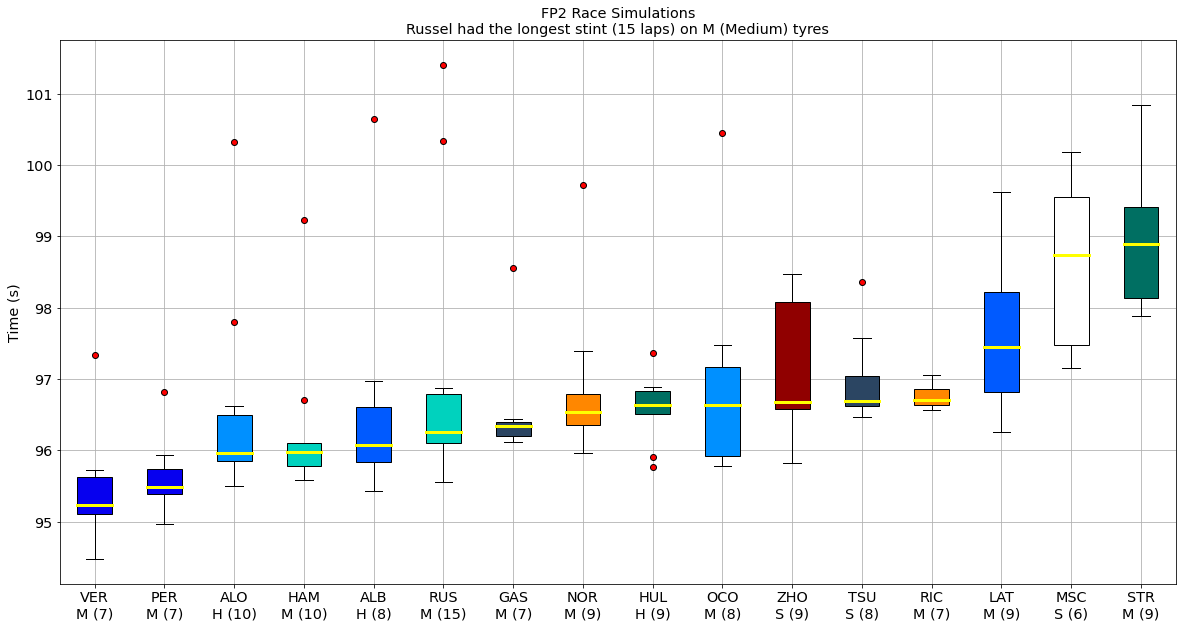

In [9]:
pltbox = plt.boxplot(sorted_times,
            patch_artist=True,
            labels=x_labels,
            flierprops=red_circle,
            medianprops=medianprops)

plt.ylabel("Time (s)")
plt.title("FP2 Race Simulations\nRussel had the longest stint (15 laps) on M (Medium) tyres")

for patch, color in zip(pltbox["boxes"], sorted_driver_colors):
    patch.set_facecolor(color)

plt.grid()
plt.savefig("./Jeddah_RaceSim.jpg")

plt.show()